In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('..')
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiPoint

In [2]:
GAS_STATIONS_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Tankstellen.csv')
GAS_PRICE_PATH = os.path.join('..', 'data', 'raw', 'input_data', 'Eingabedaten', 'Benzinpreise')
gas_stations_df = pd.read_csv(GAS_STATIONS_PATH, sep=';', names=['id', 'Name', 'Company', 'Street', 'House_Number', 'Postalcode', 'City', 'Lat', 'Long'],index_col='id')

In [3]:
gas_stations_df['Position'] = gas_stations_df.apply(lambda row: Point(row.Long, row.Lat), axis=1)

In [4]:
gas_stations_df.head(3)

,Name,Company,Street,House_Number,Postalcode,City,Lat,Long,Position
id,,,,,,,,,
1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530,POINT (8.42953 55.01589)
2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741,POINT (8.308740999999999 54.90746800000001)
3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700,POINT (8.310700000000001 54.9044)


In [5]:
positions = gpd.GeoSeries(gas_stations_df['Position'])

### Display all stations on map

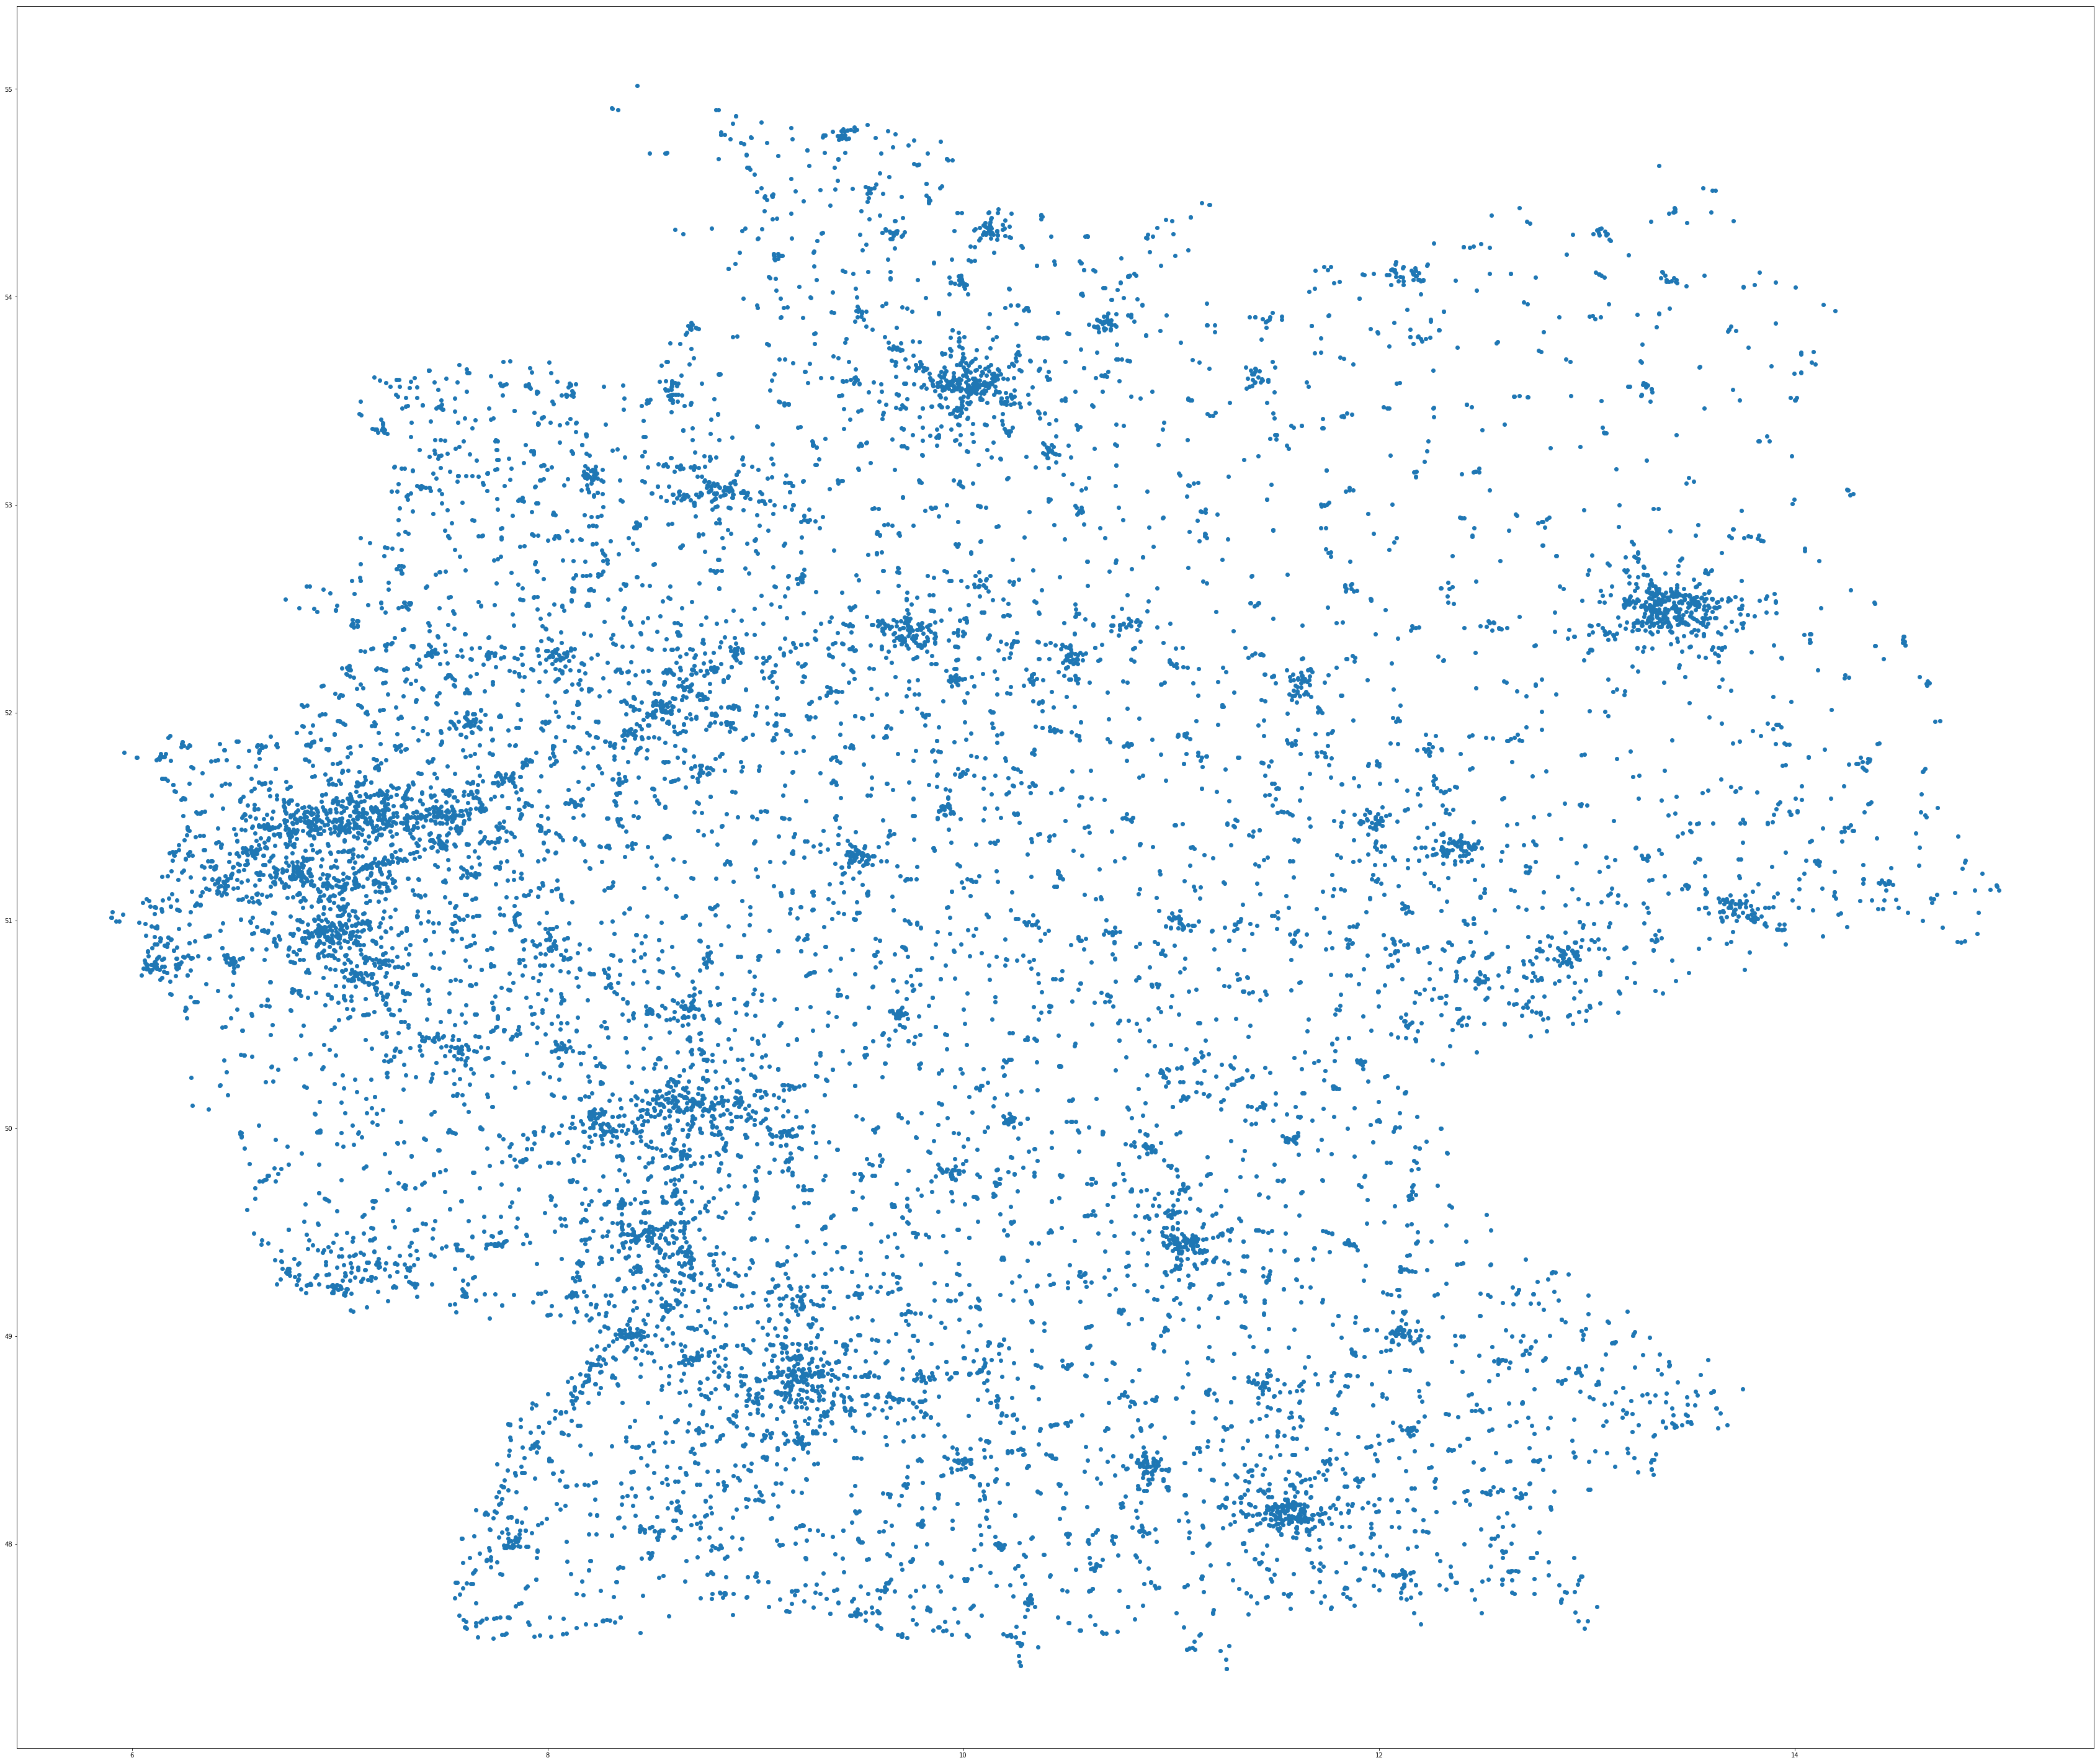

In [6]:
positions.plot(figsize=(60,60))

In [7]:
def load_station(gas_station_id):
    try:
        gas_station = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(gas_station_id)), names=['Timestamp', 'Price'],  index_col='Timestamp',parse_dates=['Timestamp'],sep=';')
    except FileNotFoundError:
        raise ValueError('You tried to access gas station with id {}, but it was not in the data.'.format(gas_station_id))
    return gas_station

In [8]:
def load_avg_price(id):
    # assume price is changed every 15 minutes
    df = load_station(id)
    return load_station(id).resample('900S').ffill().dropna()['Price'].mean()

In [9]:
load_avg_price(19)

1377.9783268313827

In [11]:
for i in range(12):
    try:
        print(load_avg_price(i))
    except ValueError:
        print("Skipped {}".format(i))

Skipped 0
1416.56912882
1450.20910384
1540.98615641
1428.70277961
Skipped 5
1478.92005239
Skipped 7
1359.9991143
1344.57203831
1369.09829207
1376.03090728


In [18]:
gas_stations_df['avg_price_15min'] = np.nan

In [16]:
gas_stations_df.loc[(1,'avg_price_15min')] = 0

In [19]:
for station in gas_stations_df.index:
    try:
        price = load_avg_price(station)
        gas_stations_df.loc[(1,'avg_price_15min')] = price
    except ValueError:
        print("Skipped {}".format(station))

Skipped 5
Skipped 7
Skipped 13
Skipped 20
Skipped 33
Skipped 39
Skipped 44
Skipped 49
Skipped 60
Skipped 94
Skipped 103
Skipped 122
Skipped 129
Skipped 136
Skipped 153
Skipped 166
Skipped 168
Skipped 175
Skipped 196
Skipped 201
Skipped 216
Skipped 227
Skipped 240
Skipped 244
Skipped 248
Skipped 249
Skipped 256
Skipped 261
Skipped 271
Skipped 277
Skipped 283
Skipped 291
Skipped 293
Skipped 303
Skipped 316
Skipped 323
Skipped 326
Skipped 344
Skipped 345
Skipped 358
Skipped 371
Skipped 378
Skipped 386
Skipped 419
Skipped 425
Skipped 427
Skipped 436
Skipped 446
Skipped 447
Skipped 457
Skipped 461
Skipped 499
Skipped 512
Skipped 536
Skipped 553
Skipped 554
Skipped 562
Skipped 565
Skipped 567
Skipped 573
Skipped 579
Skipped 580
Skipped 584
Skipped 585
Skipped 591
Skipped 603
Skipped 612
Skipped 615
Skipped 616
Skipped 638
Skipped 642
Skipped 643
Skipped 653
Skipped 654
Skipped 656
Skipped 657
Skipped 660
Skipped 662
Skipped 671
Skipped 673
Skipped 686
Skipped 687
Skipped 708
Skipped 710
Skip

Skipped 5223
Skipped 5224
Skipped 5227
Skipped 5229
Skipped 5231
Skipped 5256
Skipped 5263
Skipped 5279
Skipped 5290
Skipped 5293
Skipped 5298
Skipped 5311
Skipped 5319
Skipped 5330
Skipped 5353
Skipped 5354
Skipped 5362
Skipped 5368
Skipped 5374
Skipped 5383
Skipped 5392
Skipped 5397
Skipped 5406
Skipped 5407
Skipped 5413
Skipped 5414
Skipped 5419
Skipped 5439
Skipped 5441
Skipped 5446
Skipped 5450
Skipped 5453
Skipped 5455
Skipped 5469
Skipped 5473
Skipped 5484
Skipped 5497
Skipped 5501
Skipped 5517
Skipped 5520
Skipped 5523
Skipped 5532
Skipped 5537
Skipped 5538
Skipped 5541
Skipped 5552
Skipped 5560
Skipped 5565
Skipped 5573
Skipped 5576
Skipped 5581
Skipped 5583
Skipped 5607
Skipped 5610
Skipped 5616
Skipped 5640
Skipped 5651
Skipped 5652
Skipped 5656
Skipped 5660
Skipped 5661
Skipped 5667
Skipped 5668
Skipped 5675
Skipped 5694
Skipped 5699
Skipped 5700
Skipped 5705
Skipped 5706
Skipped 5734
Skipped 5742
Skipped 5743
Skipped 5756
Skipped 5773
Skipped 5774
Skipped 5781
Skipped 5811

Skipped 11480
Skipped 11504
Skipped 11506
Skipped 11514
Skipped 11515
Skipped 11517
Skipped 11547
Skipped 11559
Skipped 11561
Skipped 11571
Skipped 11581
Skipped 11622
Skipped 11627
Skipped 11635
Skipped 11657
Skipped 11666
Skipped 11677
Skipped 11694
Skipped 11700
Skipped 11705
Skipped 11715
Skipped 11738
Skipped 11804
Skipped 11816
Skipped 11849
Skipped 11851
Skipped 11853
Skipped 11859
Skipped 11863
Skipped 11865
Skipped 11872
Skipped 11876
Skipped 11889
Skipped 11893
Skipped 11945
Skipped 11946
Skipped 11976
Skipped 11980
Skipped 12055
Skipped 12062
Skipped 12067
Skipped 12079
Skipped 12084
Skipped 12093
Skipped 12095
Skipped 12112
Skipped 12113
Skipped 12118
Skipped 12124
Skipped 12140
Skipped 12167
Skipped 12194
Skipped 12195
Skipped 12197
Skipped 12235
Skipped 12244
Skipped 12261
Skipped 12271
Skipped 12295
Skipped 12307
Skipped 12308
Skipped 12317
Skipped 12329
Skipped 12347
Skipped 12348
Skipped 12349
Skipped 12356
Skipped 12363
Skipped 12365
Skipped 12368
Skipped 12384
Skippe

In [20]:
# load price + time sequence
# load dataframe padded

1

In [21]:
df = load_station(19)    

In [24]:
deltas = pd.Series(df.index[1:]-df.index[:-1])

In [38]:
deltas

0       14:12:00
1       02:44:00
2       03:28:00
3       04:28:00
4       10:04:00
5       06:24:00
6       03:08:00
7       02:40:00
8       01:20:00
9       00:32:00
10      03:24:00
11      00:04:00
12      09:08:00
13      02:20:00
14      02:04:00
15      02:48:00
16      01:52:00
17      02:08:00
18      00:04:00
19      02:36:00
20      00:56:00
21      00:04:00
22      10:12:00
23      00:36:00
24      03:16:00
25      02:16:00
26      01:52:00
27      02:24:00
28      00:20:00
29      03:00:00
          ...   
10925   03:09:01
10926   07:11:59
10927   00:48:01
10928   02:54:00
10929   01:29:59
10930   01:24:01
10931   00:02:59
10932   00:18:01
10933   01:48:00
10934   01:09:05
10935   01:06:11
10936   00:20:51
10937   05:21:07
10938   00:23:47
10939   06:53:58
10940   00:48:00
10941   03:48:01
10942   01:53:59
10943   00:27:01
10944   04:02:59
10945   00:21:01
10946   02:15:00
10947   03:09:00
10948   08:42:00
10949   02:38:59
10950   00:48:00
10951   01:39:04
10952   00:48:

In [40]:
x = deltas.apply(lambda x: x.round('1T').total_seconds()/60)

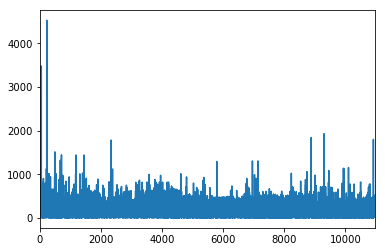

In [42]:
x.plot()

In [ ]:
def load_station(gas_station_id):
    try:
        gas_station = pd.read_csv(os.path.join(GAS_PRICE_PATH,'{}.csv'.format(gas_station_id)), names=['Timestamp', 'Price'],  index_col='Timestamp',parse_dates=['Timestamp'],sep=';')
    except FileNotFoundError:
        raise ValueError('You tried to access gas station with id {}, but it was not in the data.'.format(gas_station_id))
    return gas_station
df = load_station(19)    
deltas = pd.Series(df.index[1:]-df.index[:-1])
deltas_in_minutes = deltas.apply(lambda x: x.round('1T').total_seconds()/60)

